In [1]:
import numpy
import os
import json
import csv
import pandas as pd
import numpy as np
np.random.seed(42)

In [2]:
path = "../data"

In [3]:
file = "5output.csv"

In [4]:
data = pd.read_csv(os.path.join(path,file),header=None)
unbalancedData = pd.read_csv(os.path.join(path,file),header=None)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,Kuntal-01234,-1.905935,-2.114657,-2.194153,-1.010309,-0.835438,-0.806199,-0.942649,-31.620321,-0.977525,...,0.081189,-0.141640,-0.224180,0.139840,-0.948207,-1.031253,0.302107,0.635007,0.0,0
1,Kuntal-12345,-1.792855,-2.052450,-2.204335,-0.934278,-0.713848,-0.692895,-0.937744,-57.419318,-0.975928,...,0.080267,-0.141640,-0.224180,0.139840,-0.948207,-1.031253,0.302107,0.635007,0.0,0
2,Kuntal-23456,-1.460079,-1.774524,-1.821726,-0.791803,-0.472376,-0.636039,-0.933396,-51.253766,-0.974025,...,0.075553,-0.145587,-0.242633,0.124593,-0.948207,-1.031253,0.302107,0.635007,0.0,0
3,Kuntal-34567,-1.352800,-1.751287,-1.765802,-0.738293,-0.544694,-0.581740,-0.932694,-27.062430,-0.972367,...,0.075553,-0.155820,-0.264640,0.119300,-0.948207,-1.031253,0.302107,0.635007,0.0,0
4,Kuntal-45678,-1.081940,-1.645485,-1.613712,-0.735786,-0.476589,-0.551839,-0.946488,-1.994983,-0.971327,...,0.073120,-0.172193,-0.307040,0.102567,-0.948207,-1.330800,0.302107,0.635007,0.0,0


In [8]:
noneatData = data[data[data.columns[134]]==0]

In [9]:
eatData = data[data[data.columns[134]]==1]

In [10]:
print(noneatData.shape,eatData.shape)

(74469, 135) (3181, 135)


In [11]:
noneatData = noneatData.sample(n=3181)

In [12]:
print(noneatData.shape,eatData.shape)

(3181, 135) (3181, 135)


### Data Vectorization

In [13]:
data = pd.concat([noneatData,eatData])

In [14]:
X_data = np.array(data[data.columns[1:134]].values.tolist())
X_unbalancedData = np.array(unbalancedData[unbalancedData.columns[1:134]].values.tolist())

In [15]:
#data[data.columns[134]].head()
X_data[0].shape

(133,)

In [16]:
print (X_data.shape,X_unbalancedData.shape)

(6362, 133) (77650, 133)


In [17]:
Y_data = np.array(data[data.columns[134]].values.tolist())
Y_unbalancedData = np.array(unbalancedData[unbalancedData.columns[134]].values.tolist())

In [18]:
print(Y_data.shape,Y_unbalancedData.shape)

(6362,) (77650,)


### Feature Selection

#### L1-based feature selection

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [20]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_data, Y_data)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_data)
X_new.shape

/home/kuntal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(6362, 17)

#### Tree-based feature selection (Works very good)

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clfTree = ExtraTreesClassifier(n_estimators=50)
clfTree = clfTree.fit(X_data, Y_data)
print (clfTree.feature_importances_)  

model = SelectFromModel(clfTree, prefit=True)
X_new = model.transform(X_data)
print (X_new.shape)

[0.01974867 0.         0.         0.         0.00025133 0.00025133
 0.00025133 0.         0.         0.01974867 0.03974867 0.
 0.00025133 0.01974867 0.03974867 0.00025133 0.05924602 0.03949734
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00075398 0.00050266 0.03974867 0.
 0.00025133 0.05924602 0.         0.         0.00025133 0.02
 0.         0.         0.01974867 0.         0.01974867 0.01974867
 0.01974867 0.01974867 0.         0.02       0.         0.03949734
 0.         0.         0.00025133 0.         0.00025133 0.00025133
 0.01974867 0.00025133 0.         0.         0.02       0.
 0.         0.02       0.         0.         0.         0.00050266
 0.03974867 0.00025133 0.         0.00025133 0.02       0.
 0.         0.00050266 0.00025133 0.         0.05924602 0.
 0.         0.04       0.         0.00025133 0.         0.
 0.   

In [22]:
X_unbalanced_new = model.transform(X_unbalancedData)
print(X_unbalanced_new.shape)

(77650, 34)


### Classification

In [23]:
from sklearn.svm import SVC

In [24]:
clf = SVC(gamma='auto')

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_data, test_size=0.30, random_state=42, shuffle =True)

In [26]:
print (y_train)

[1 1 1 ... 1 1 0]


In [27]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
from sklearn.metrics import accuracy_score
preds_val = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.96%


#### Parameter Search by GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(XData, yData, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ["linear", "rbf","sigmoid"]
    #kernels = ["linear"]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
    grid_search = GridSearchCV(SVC(cache_size=2000), param_grid, cv=nfolds, n_jobs=-1, verbose=2)
    grid_search.fit(XData, yData)
    grid_search.best_params_
    return grid_search.best_params_

In [30]:
best_params = svc_param_selection(X_train,y_train,5)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


In [31]:
best_params

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

In [32]:
clf = SVC(gamma=best_params['gamma'], C=best_params['C'], kernel = best_params['kernel'])
#clf = SVC(gamma=0.001, C=0.1, kernel = 'linear')

In [33]:
clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Testing Accuracy

In [34]:
preds_val = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.96%


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, preds_val)

array([[762, 200],
       [488, 459]])

In [37]:
preds_val.shape

(1909,)

In [38]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[762 200]
 [488 459]]


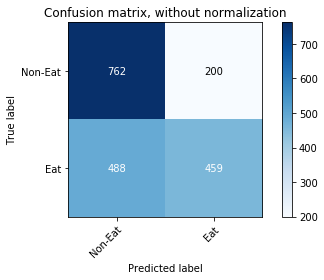

In [39]:
plot_confusion_matrix(y_test, preds_val,np.array(['Non-Eat','Eat']))

#### Testing with Unbalanced data (77670 samples)

In [40]:
#print(X_unbalanced_new.shape)
preds_val_unbalanced = clf.predict(X_unbalanced_new)
accuracy = accuracy_score(Y_unbalancedData, preds_val_unbalanced)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.99%


Confusion matrix, without normalization
[[59100 15369]
 [ 1721  1460]]


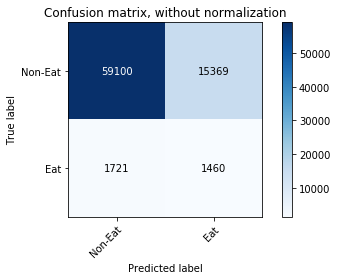

In [41]:
plot_confusion_matrix(Y_unbalancedData, preds_val_unbalanced,np.array(['Non-Eat','Eat']))

### Training Accuracy

In [42]:
print(X_train.shape)
preds_val_train = clf.predict(X_train)
accuracy = accuracy_score(y_train, preds_val_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(4453, 34)
Accuracy: 61.82%


Confusion matrix, without normalization
[[1752  467]
 [1233 1001]]


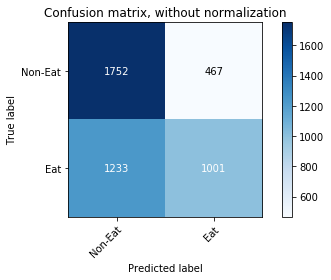

In [43]:
plot_confusion_matrix(y_train, preds_val_train,np.array(['Non-Eat','Eat']))

## Random Forest

In [44]:
from  sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=0)

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(5,10,20), 
              'max_depth': range(1, 10, 5),
             }
    

In [46]:
model1.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [56]:
gs_clf1 = GridSearchCV(model1,parameters, cv=5, n_jobs=1,verbose=2)

In [59]:
print (X_train.shape, y_train.shape)
model2 = gs_clf1.fit(X_train, y_train)

(4453, 34) (4453,)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ...................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   0.0s
[CV] max_depth=6, n_estimators=5 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [60]:
print(model2.best_params_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, model2.best_params_[param_name]))

{'max_depth': 1, 'n_estimators': 5}
max_depth: 1
n_estimators: 5


In [61]:
from sklearn.metrics import accuracy_score
preds_val = model2.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.96%


Confusion matrix, without normalization
[[762 200]
 [488 459]]


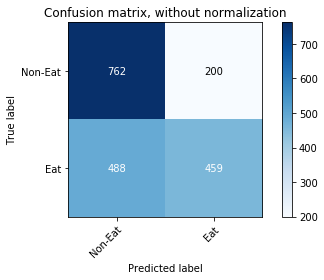

In [62]:
plot_confusion_matrix(y_test, preds_val,np.array(['Non-Eat','Eat']))

#### Training Accuracy

In [63]:
from sklearn.metrics import accuracy_score
preds_val_train = model2.predict(X_train)
accuracy = accuracy_score(y_train, preds_val_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.82%


Confusion matrix, without normalization
[[1752  467]
 [1233 1001]]


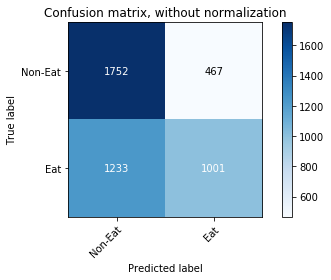

In [64]:
plot_confusion_matrix(y_train, preds_val_train,np.array(['Non-Eat','Eat']))

#### Test with unbalanced data

In [65]:
from sklearn.metrics import accuracy_score
preds_val = model2.predict(X_unbalanced_new)
accuracy = accuracy_score(Y_unbalancedData, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.99%


Confusion matrix, without normalization
[[59099 15370]
 [ 1721  1460]]


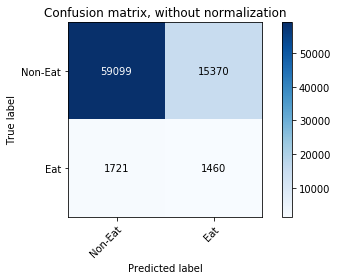

In [66]:
plot_confusion_matrix(Y_unbalancedData, preds_val,np.array(['Non-Eat','Eat']))